# 朴素贝叶斯和SVM实例讲解与分析


## 朴素贝叶斯
### 朴素贝叶斯的原理
- 数学推导

#### 1
P(A) -> A 事件发生的概率，例如明天天晴的概率

P(A|B) -> 条件概率，B 事件发生的前提下 A 事件发生的概率，例如明天天晴而我又没带伞的概率

P(输入句子) -> 这个句子在训练数据中出现的概率

P(赌博) -> 赌博类别的句子在训练数据中出现的概率

P(赌博 | 输入句子) -> 输入句子是赌博类别的概率（也是我们最终要求的值）

P(赌博 | 输入句子) + P(正常 | 输入句子) = 100%

#### 2

P(赌博|输入句子) = P(赌博，输入句子) / P(输入句子)

P(输入句子|赌博) = P(赌博，输入句子) / P(赌博) 

P(赌博|输入句子) = P(输入句子|赌博) * P(赌博) / P(输入句子)

#### 3

##### P(赌博)

指训练数据中，赌博类别的句子占训练数据的百分比。

----

##### P(输入句子)

指这个输入句子出现在训练数据中的概率。我们最终目的是判断输入句子是哪个类别的概率比较高，也就是比较P(赌博|输入句子)与P(正常|输入句子)，由贝叶斯定理：

>P(赌博|输入句子) = P(输入句子|赌博) * P(赌博) / P(输入句子) 

>P(正常|输入句子) = P(输入句子|正常) * P(正常) / P(输入句子) 



>P(赌博|输入句子) = P(输入句子|赌博) * P(赌博) 

>P(正常|输入句子) = P(输入句子|正常) * P(正常)

-----

##### P(输入句子|赌博)

最关键的就是求P(输入句子|赌博)，直接求输入句子在赌博类别句子中出现的概率非常困难，因为训练数据不可能包含所有句子，很可能并没有输入句子。什么意思呢？因为同一个句子，把词语进行不同的排列组合都能成立，例如：

>奖金将在您完成首存后即可存入您的账户。真人荷官，六合彩，赌球欢迎来到全新番摊游戏！

可以变成

>奖金将在您完成首存后即可存入您的账户。六合彩，赌球，真人荷官欢迎来到全新番摊游戏！

或者

>欢迎来到全新番摊游戏，奖金将在您完成首存后即可存入您的账户。六合彩，真人荷官，赌球！

稍微变换词语的位置就是一个新的句子了，训练数据不可能把所有排列组合的句子都加进去，因为实在太多了。所以当我们遇到一个输入句子，很可能它在训练数据中没有出现，那么P(输入句子|类别)对应的概率都为零，这显然不是真实的结果。也会导致我们的分类器出错，这个时候该怎么办呢？刚刚在贝叶斯模型中我们提到，它会将一个句子分成不同的词语来综合分析，那我们是不是也可以把句子当成词语的集合呢？

警方召开了全省集中打击赌博违法犯罪活动专项行动电视电话会议。会议的重点是“查处”六合彩、赌球赌马等赌博活动。

警方召开了全省…赌马等赌博活动 = 警方 + 召开 + 全省…+赌博活动

即：

P(输入句子|赌博) = (P(词语1) * P(词语2|词语1) * P(词语3|词语2))|赌博) ≈ P(词语1)|P(赌博) * P(词语2)|P(赌博) * P(词语3)|P(赌博)

P(警方召开了全省…赌马等赌博活动。|赌博) = P(警方|赌博) * P(召开|赌博) * P(全省|赌博) … * P(赌马|赌博) * P(赌博活动|赌博)

我们把P(输入句子|赌博)分解成所有P(词语|赌博)概率的乘积，然后通过训练数据，计算每个词语在不同类别出现的概率。最终获取的是输入句子有效词语在不同类别中的概率。


词语 |正常|	赌博
:--|:--:|--:
警方|	0.8|	0.2
召开|	0.7|	0.3
全省|	0.7|	0.3
赌马|	0.4|	0.6
赌球|	0.3|	0.7
赌博活动|	0.4|	0.6
---|---|---
综合概率|	0.8|	0.2

在上面的例子中，虽然赌马，赌球，赌博活动这几个词是赌博类别的概率很高，但是综合所有词语，分类器判断输入句子有80%的概率是正常句子。简单来说，要判断句子是某个类别的概率，只需要计算该句子有效部分的词语的在该类别概率的乘积。



In [10]:
# 安装结巴分词
!pip install jieba






Looking in indexes: http://mirrors.aliyun.com/pypi/simple/


### jieba分词
- jieba.cut方法接受两个输入参数: 1) 第一个参数为需要分词的字符串 2）cut_all参数用来控制是否采用全模式
- jieba.cut_for_search方法接受一个参数：需要分词的字符串,该方法适合用于搜索引擎构建倒排索引的分词，粒度比较细 注意：待分词的字符串可以是gbk字符串、utf-8字符串或者unicode
- jieba.cut以及jieba.cut_for_search返回的结构都是一个可迭代的generator，可以使用for循环来获得分词后得到的每一个词语(unicode)，也可以用list(jieba.cut(…))转化为list

In [11]:
# jieba分词的功能演示


import jieba

seg_list = jieba.cut("我来到北京清华大学", cut_all=True)
print("/ ".join(seg_list) )# 全模式

seg_list = jieba.cut("我来到北京清华大学", cut_all=False)
print ("/ ".join(seg_list) )# 精确模式

seg_list = jieba.cut("他来到了网易杭研大厦")  # 默认是精确模式
print (", ".join(seg_list))

seg_list = jieba.cut("小明硕士毕业于中国科学院计算所，后在日本京都大学深造")  # 默认是精确模式
print (", ".join(seg_list))

seg_list = jieba.cut_for_search("小明硕士毕业于中国科学院计算所，后在日本京都大学深造")  # 搜索引擎模式
print( ", ".join(seg_list))

我/ 来到/ 北京/ 清华/ 清华大学/ 华大/ 大学
我/ 来到/ 北京/ 清华大学
他, 来到, 了, 网易, 杭研, 大厦
小明, 硕士, 毕业, 于, 中国科学院, 计算所, ，, 后, 在, 日本京都大学, 深造
小明, 硕士, 毕业, 于, 中国, 科学, 学院, 科学院, 中国科学院, 计算, 计算所, ，, 后, 在, 日本, 京都, 大学, 日本京都大学, 深造


### cherry分类器的使用

[cherry的github地址](https://github.com/Windsooon/cherry)

- cherry 自带两个预训练模型，使用预训练模型进行分类只需一行代码。使用自己的数据集进行定制训练也只需要十行代码。同时 cherry 支持自定义分词算法，分类算法以及 stop words 词库。

#### 安装

In [12]:

# 安装cherry分类器
!pip install -U cherry

Looking in indexes: http://mirrors.aliyun.com/pypi/simple/
The repository located at mirrors.aliyun.com is not a trusted or secure host and is being ignored. If this repository is available via HTTPS we recommend you use HTTPS instead, otherwise you may silence this warning and allow it anyway with '--trusted-host mirrors.aliyun.com'.
Requirement already up-to-date: cherry in /Users/cube.z/anaconda3/lib/python3.7/site-packages (0.5.6)


#### 使用方法
由于数据量过大，cherry 库并没有包含训练数据，所以预训练模型只支持 classify() 方法，使用其他方法需使用自定义数据集。 预训练模型包含 2个 数据集，分别是：

赌博 / 正常 / 政治 / 色情 (model='harmful'，4个 类别包含约 1000条 中文句子)
彩票 / 科技 / 财经 / 房产 / 社会 / 体育 / 娱乐 (model=news，7个 类别包含约 45000条 中文新闻)
使用预训练模型进行文本分类非常简单，只需要直接调用 classify() 方法，可以指定两个参数，text 是由待分类文本组成的列表，models 是训练时指定的文件夹名。

In [18]:
import cherry

# 基本的测试案例
res = cherry.classify(model='harm', text=['她们对计算机很有热情，也希望学习到数据分析，网络爬虫，人工智能等方面的知识，从而运用在她们工作上'])
#输出待分类文本中前 20个 词语（按出现频率降序排列）
res.word_list
    

CacheNotFoundError: Cache files not found,maybe you should train the data first.

In [13]:
# probability 包含对应类别索引下的概率（索引与每一条训练数据最后的类别一致）
print("返回结果分别对应 赌博，正常，政治，色情 4个 类别的概率")
res.probability

返回结果分别对应 赌博，正常，政治，色情 4个 类别的概率


array([[4.43336608e-03, 9.95215198e-01, 3.51419231e-04, 1.68657851e-08]])

In [17]:
# 赌博信息的测试案例
res = cherry.classify(model='harmful', text=['美女荷官,在线发牌'])
# probability 包含对应类别索引下的概率（索引与每一条训练数据最后的类别一致）
print("返回结果分别对应 赌博，正常，政治，色情 4个 类别的概率")
res.probability#### 使用方法


返回结果分别对应 赌博，正常，政治，色情 4个 类别的概率


array([[9.99999017e-01, 1.14275602e-08, 1.80071754e-09, 9.69453467e-07]])

#### 自己制作一个训练集
我们可以通过自行输入一些相关信息，来构建一个训练集，进行判断分类。

#### 数据集
数据集需要包含两个文件（参考 example/data_example 文件夹）

- 数据集 data.xxx（需命名为 data开头，任意后缀的文件）
- 停止词 stop_words.xxx（需命名为 stop_words开头，任意后缀的文件，停止词可直接拷贝 example 文件夹中自带的 stop_words.txt）

数据集中每一行代表一条数据，数据结束后需要添加 ',' 以及对应的分类类别（不需要空格），例如：

>这是一条正常数据,0
>这是赌博相关数据,1

cherry 会提取每一行数据最后的类别作为标签进行训练。

- 停止词
stop_words.xxx 文件每行包含一个停止词，例如

>或者
不只
而且
还有
即使
接着
具体步骤

1.在 data 文件夹内新建 your_folder 文件夹，你的模型所有数据以及生成的缓存都会存放在此文件夹中。
2.把 data.xxx 以及 stop_words.xxx 放在文件夹中（可参考例子）。your_folder 用作调用 APIs 时需要的 model 参数。

In [20]:
# 演示如何构建一个数据集 ccexample
# /Users/cube.z/anaconda3/lib/python3.7/site-packages/cherry/data/

cherry.train(model='classtest')
res = cherry.classify(model='classtest', text=['我们今天会不会拖堂'])
# probability 包含对应类别索引下的概率（索引与每一条训练数据最后的类别一致）
print("返回结果分别对应正常、赌博 2个 类别的概率")
res.probability


# 演示一个实例比较数据集大小之间的不同差异

Training may take some time depending on your dataset
返回结果分别对应正常、赌博 2个 类别的概率


array([[0.5, 0.5]])

## SVM
### SVM实例分享
接下来我们以[鸢尾花卉数据集（lris）](https://www.jianshu.com/p/6ada344f91ce)样本，使用SVM对其进行分类，lris是一类多重变量分析的数据集。通过花萼长度，花萼宽度，花瓣长度，花瓣宽度4个属性预测鸢尾花卉属于（Setosa，Versicolour，Virginica）三个种类中的哪一类。





#### 导入数据
使用sklearn中导入数据的库（datasets）进行数据的导入，为方便可视化起见，这里我们花瓣长度，花瓣宽度为两个特征，并由此构建一个特征矩阵X,同时将对应花的类标赋给向量Y,具体实现如下：

计算svc分类器的准确率
训练集: 0.8555555555555555
测试集: 0.7
也可直接调用accuracy_score方法计算准确率
训练集： 0.8555555555555555
测试集： 0.7
train_decision_function:
 [[ 1.00809313  1.01540937  0.151101  ]
 [-1.00777232 -1.00008021  0.63444159]
 [-0.99416388 -1.06070485 -0.681607  ]
 [ 1.0000563   1.00031087  0.05426675]
 [ 1.01709573  1.02782828  0.14377175]
 [-0.94393468 -1.02064785 -1.00008844]
 [ 0.99963476  1.00001849  0.15117146]
 [-0.96836014 -0.99980535  0.58258857]
 [-0.57544729 -1.05719931 -1.38921374]
 [-0.99957828 -1.07645757 -0.44947688]
 [-1.06076059 -1.12561405  1.00935269]
 [-0.61824976 -1.00025184 -0.99988863]
 [-1.04911984 -1.01738974  0.82720369]
 [ 1.0004868   0.99973226  0.15150631]
 [-0.99959974 -0.27106766  1.00008043]
 [-1.00037028 -1.0072383  -0.79454   ]
 [-0.94393468 -1.02064785 -1.00008844]
 [-1.16901646 -0.68521942  0.99969349]
 [-0.36188214 -1.05474156 -1.22681095]
 [-0.99998921 -0.7292288   1.00000149]
 [ 0.9997492   1.00028017  0.16527647]
 [ 1.10037424  1.1294864   0.11662767]
 [ 0.9999

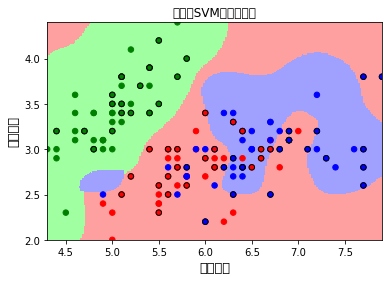

In [21]:
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import sklearn
from sklearn.model_selection import train_test_split

#define converts(字典)
def Iris_label(s):
    it={b'Iris-setosa':0, b'Iris-versicolor':1, b'Iris-virginica':2}
    return it[s]

#1.读取数据集  
path='iris.data'
data=np.loadtxt(path,dtype=float,delimiter=',',converters={4:Iris_label})
#converters={4:Iris_label}中“4”指的是第5列：将第5列的str转化为label(number)  
#print(data.shape)  

#2.划分数据与标签  
x,y=np.split(data,indices_or_sections=(4,),axis=1) #x为数据,y为标签
x=x[:,0:2]
train_data,test_data,train_label,test_label =train_test_split(x,y, random_state =1,train_size=0.6,test_size=0.4) #sklearn.model_selection.
#print(train_data.shape)

#3.训练svm分类器
classifier=svm.SVC(C=2,kernel='rbf',gamma=10,decision_function_shape='ovo')#ovr:一对多策略
classifier.fit(train_data,train_label.ravel()) #ravel函数在降维时默认是行序优先  

#4.计算svc分类器的准确率
print("计算svc分类器的准确率")
print("训练集:",classifier.score(train_data,train_label))
print("测试集:",classifier.score(test_data,test_label))

#也可直接调用accuracy_score方法计算准确率
print("也可直接调用accuracy_score方法计算准确率")
from sklearn.metrics import accuracy_score
tra_label=classifier.predict(train_data) #训练集的预测标签
tes_label=classifier.predict(test_data) #测试集的预测标签
print("训练集：",accuracy_score(train_label,tra_label))
print("测试集：",accuracy_score(test_label,tes_label))

#查看决策函数
print('train_decision_function:\n',classifier.decision_function(train_data))#(90,3)
print('predict_result:\n',classifier.predict(train_data))

#5.绘制图形
#确定坐标轴范围
x1_min,x1_max=x[:,0].min(),x[:,0].max()#第0维特征的范围
x2_min, x2_max=x[:,1].min(),x[:,1].max()#第1维特征的范围
x1,x2=np.mgrid[x1_min:x1_max:200j,x2_min:x2_max:200j]#生成网络采样点
grid_test=np.stack((x1.flat,x2.flat),axis=1)#测试点
#指定默认字体
matplotlib.rcParams['font.sans-serif']=['SimHei']
#设置颜色
cm_light=matplotlib.colors.ListedColormap(['#A0FFA0','#FFA0A0','#A0A0FF'])
cm_dark=matplotlib.colors.ListedColormap(['g','r','b'])

grid_hat = classifier.predict(grid_test)  # 预测分类值
grid_hat = grid_hat.reshape(x1.shape) # 使之与输入的形状相同

plt.pcolormesh(x1,x2,grid_hat,cmap=cm_light)#预测值的显示
plt.scatter(x[:,0],x[:,1],c=y[:,0],s=30,cmap=cm_dark)#样本
plt.scatter(test_data[:,0],test_data[:,1],c=test_label[:,0], s=30,edgecolors='k',zorder=2,cmap=cm_dark)#圈中测试集样本点  
plt.xlabel('花萼长度',fontsize=13)
plt.ylabel('花萼宽度',fontsize=13)
plt.xlim(x1_min,x1_max)
plt.ylim(x2_min,x2_max)
plt.title('鸢尾花SVM二特征分类')
plt.show()